In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [98]:
df_umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")
print(df_umsatz.head())
df_umsatz.info()

        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datum        9334 non-null   object 
 1   Warengruppe  9334 non-null   int64  
 2   Umsatz       9334 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 218.9+ KB


In [97]:
df_kiwo = pd.read_csv("kiwo.csv")
print(df_kiwo.head())
df_kiwo.info()

        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datum        72 non-null     object
 1   KielerWoche  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [99]:
df_wetter = pd.read_csv("wetter.csv")
print(df_wetter.head())
df_wetter.info()

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                2601 non-null   object 
 1   Bewoelkung           2591 non-null   float64
 2   Temperatur           2601 non-null   float64
 3   Windgeschwindigkeit  2601 non-null   int64  
 4   Wettercode           1932 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 101.7+ KB


In [101]:
#mergen der Dataframes, kielerwoche df wird als leftjoin gemerged damit alle Datenpukte erhalten bleiben

df_umsatz_kiwo_wetter = df_umsatz.merge(df_kiwo, on='Datum', how='left').merge(df_wetter, on='Datum')
df_umsatz_kiwo_wetter['KielerWoche'] = df_umsatz_kiwo_wetter['KielerWoche'].fillna(0)
print(df_umsatz_kiwo_wetter.head())
print(df_umsatz_kiwo_wetter.tail())

        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          0.0         6.0     17.8375   
1  2013-07-02            1  159.793757          0.0         3.0     17.3125   
2  2013-07-03            1  111.885594          0.0         7.0     21.0750   
3  2013-07-04            1  168.864941          0.0         7.0     18.8500   
4  2013-07-05            1  171.280754          0.0         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                   15        20.0  
1                   10         NaN  
2                    6        61.0  
3                    7        20.0  
4                   12         NaN  
           Datum  Warengruppe     Umsatz  KielerWoche  Bewoelkung  Temperatur  \
9313  2017-12-21            6  87.471228          0.0         7.0      6.2375   
9314  2017-12-22            6  71.911652          0.0         7.0      5.7625   
9315  2017-12-23            6  84.062223          0.0       

In [82]:
df_umsatz_kiwo_wetter.describe()

,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,9318.000000,9318.000000,9318.000000,9264.000000,9318.000000,9318.000000,7009.000000
mean,3.088002,206.782933,0.023932,4.720747,12.028483,10.974780,36.900128
std,1.488889,144.586222,0.152846,2.646273,7.232829,4.131974,27.095884
min,1.000000,7.051201,0.000000,0.000000,-8.475000,3.000000,0.000000
25%,2.000000,96.864379,0.000000,3.000000,6.237500,8.000000,10.000000
50%,3.000000,161.945865,0.000000,6.000000,11.625000,10.000000,28.000000
75%,4.000000,280.692490,0.000000,7.000000,17.962500,13.000000,61.000000
max,6.000000,1879.461831,1.000000,8.000000,31.437500,35.000000,95.000000


In [ ]:
# die Wettercodes 1, 2 und 4 enthalten NaN-Werte (Not a Number-Werte) und Bewoelkung ebenfalls
df_umsatz_kiwo_wetter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                9318 non-null   object 
 1   Warengruppe          9318 non-null   int64  
 2   Umsatz               9318 non-null   float64
 3   KielerWoche          9318 non-null   float64
 4   Bewoelkung           9264 non-null   float64
 5   Temperatur           9318 non-null   float64
 6   Windgeschwindigkeit  9318 non-null   int64  
 7   Wettercode           7009 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 582.5+ KB


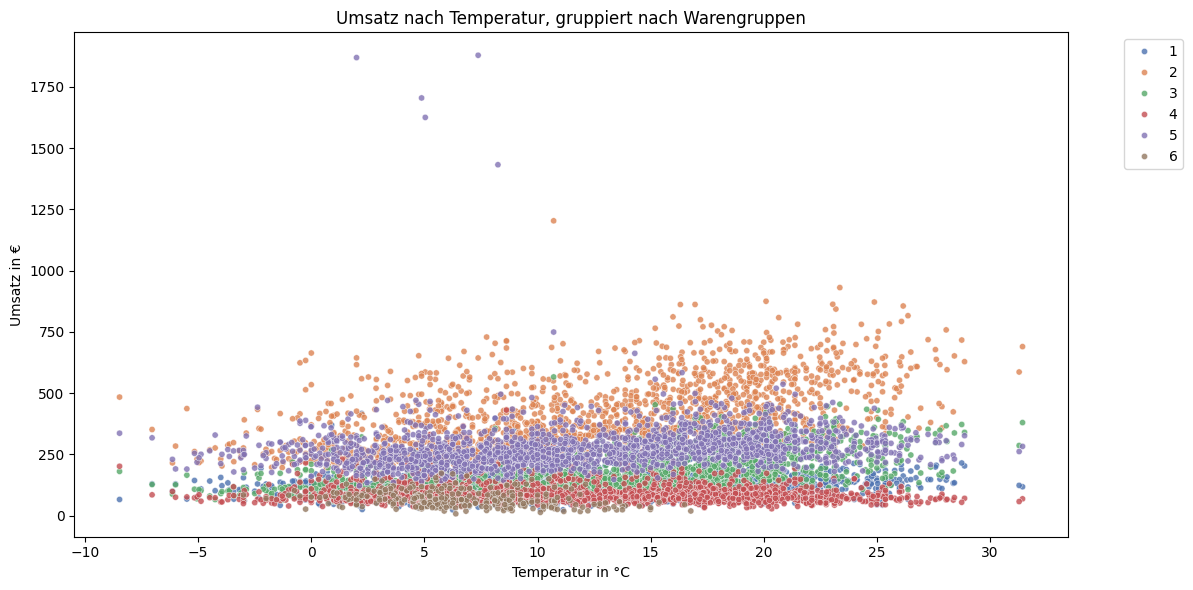

In [91]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_umsatz_kiwo_wetter,
                x='Temperatur',
                y='Umsatz',
                hue='Warengruppe',
                alpha=0.8,
                palette='deep',
                s=20)

plt.title('Umsatz nach Temperatur, gruppiert nach Warengruppen')
plt.xlabel('Temperatur in °C')
plt.ylabel('Umsatz in €')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

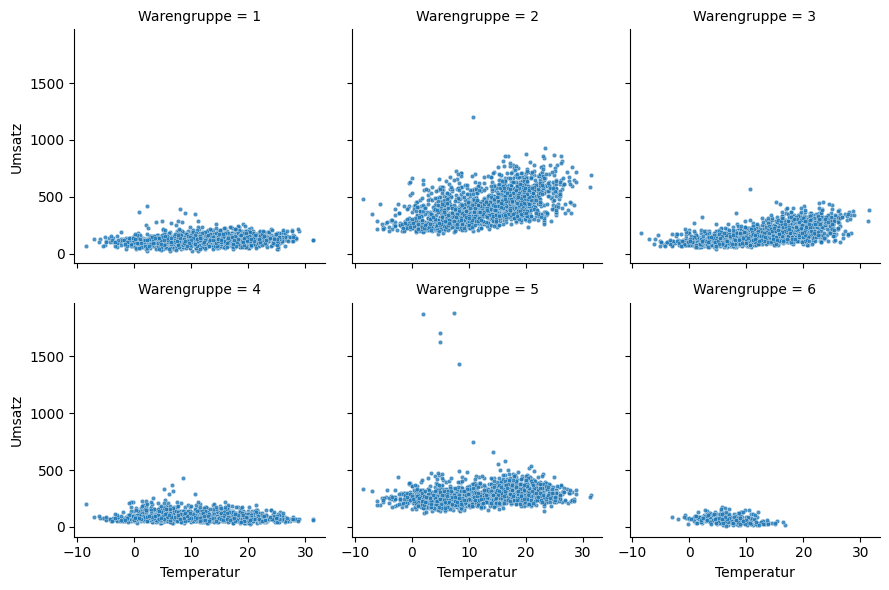

In [95]:
g = sns.FacetGrid(df_umsatz_kiwo_wetter, col="Warengruppe", col_wrap=3)
g.map(sns.scatterplot, "Temperatur", "Umsatz", alpha=0.8, s=10)


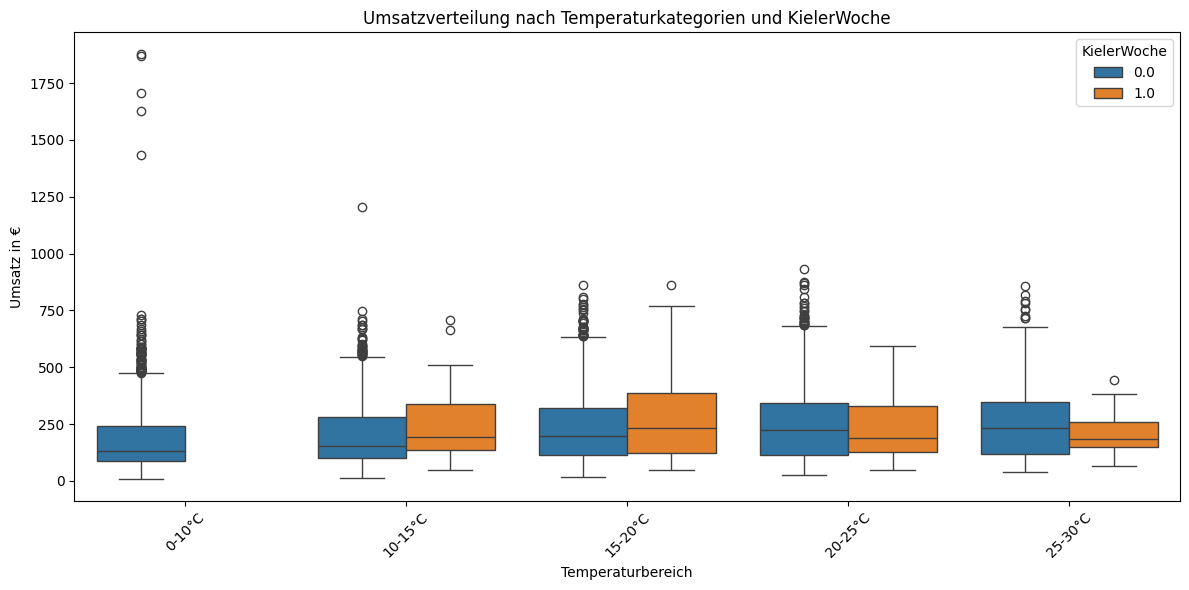

In [102]:
plt.figure(figsize=(12, 6))
# Temperatur in Kategorien einteilen
df_umsatz_kiwo_wetter['Temp_Kategorie'] = pd.cut(df_umsatz_kiwo_wetter['Temperatur'],
                                                bins=[0, 10, 15, 20, 25, 30],
                                                labels=['0-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C'])

sns.boxplot(data=df_umsatz_kiwo_wetter,
           x='Temp_Kategorie',
           y='Umsatz',
           hue='KielerWoche')

plt.title('Umsatzverteilung nach Temperaturkategorien und KielerWoche')
plt.xlabel('Temperaturbereich')
plt.ylabel('Umsatz in €')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_6231/969659384.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_umsatz_kiwo_wetter.pivot_table(


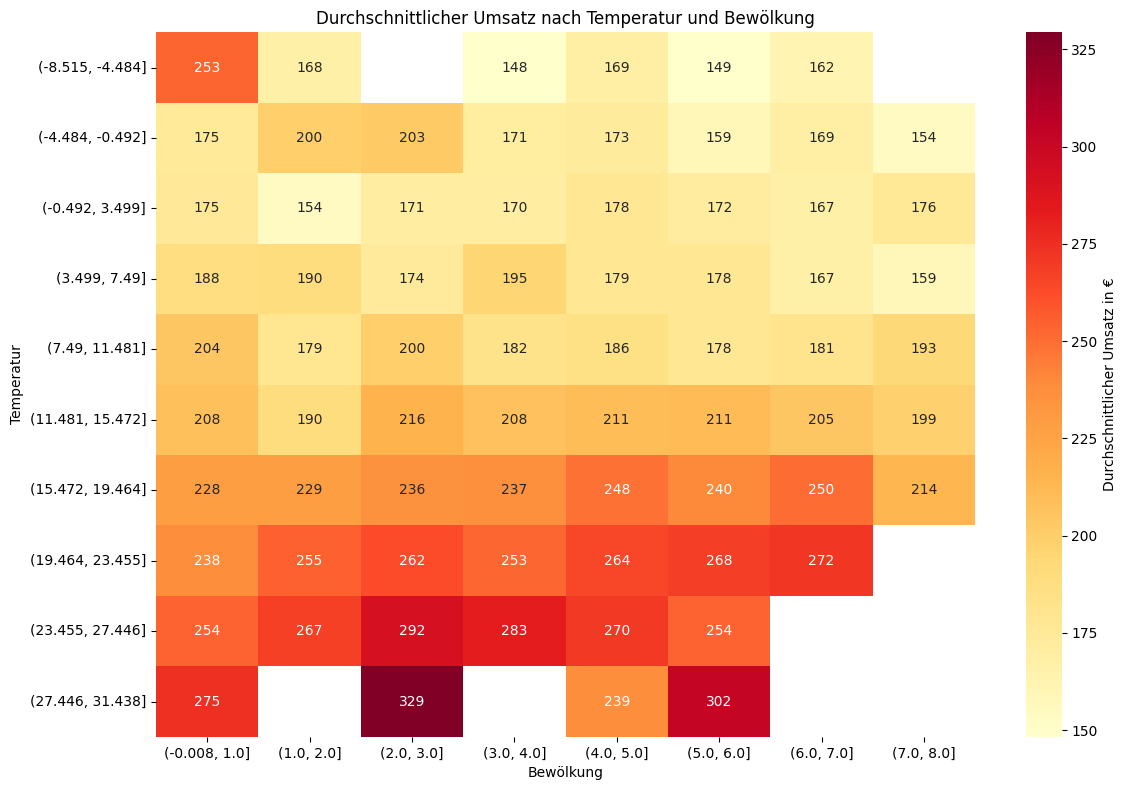

In [106]:
plt.figure(figsize=(12, 8))
# Durchschnittlichen Umsatz für Temperatur-Bewölkungs-Kombinationen berechnen
pivot_table = df_umsatz_kiwo_wetter.pivot_table(
    values='Umsatz',
    index=pd.cut(df_umsatz_kiwo_wetter['Temperatur'], bins=10),  # 10 Temperaturkategorien
    columns=pd.cut(df_umsatz_kiwo_wetter['Bewoelkung'], bins=8),  # 8 Bewölkungskategorien
    aggfunc='mean'
)

sns.heatmap(pivot_table, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.0f',
            cbar_kws={'label': 'Durchschnittlicher Umsatz in €'})

plt.title('Durchschnittlicher Umsatz nach Temperatur und Bewölkung')
plt.xlabel('Bewölkung')
plt.ylabel('Temperatur')
plt.tight_layout()
plt.show()